### PCA

- 여러 차원의 특징을 가장 잘 설명해주는 주성분을 이용

1. 데이터 표준화(단위 통일) 및 원점 이동
2. 주성분 착기
    - 중심을 지나면서도 모든 데이터들의 수직거리의 합이 가장 가깝도록 하는 선
    - 분산이 최대가 되도록 하는 선
3. 데이터 투영하기
    - 데이터를 주성분 위로 옮김
4. 새로운 축(주성분)을 기준으로 데이터 회전
    - 각각 x축과 y축이 되도록

<Axes: xlabel='0', ylabel='1'>

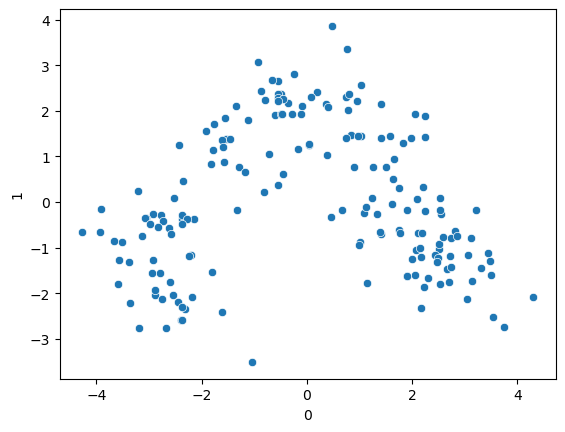

In [1]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 스케일링
df_mean = df.mean()  # 각 컬럼의 평균값
df_std = df.std()  # 각 컬럼의 표준편차
scaled_df = (df - df_mean)/df_std  # 컬럼별 표준화 진행

# PCA 모델 생성
pca = PCA(n_components=2)
pca.fit(scaled_df) # PCA 학습

wine_pca = pca.transform(scaled_df) # PC로 데이터 변환
pca_df = pd.DataFrame(wine_pca) # 데이터프레임으로 변환

# 시각화
sns.scatterplot(data=pca_df, x = 0, y = 1)


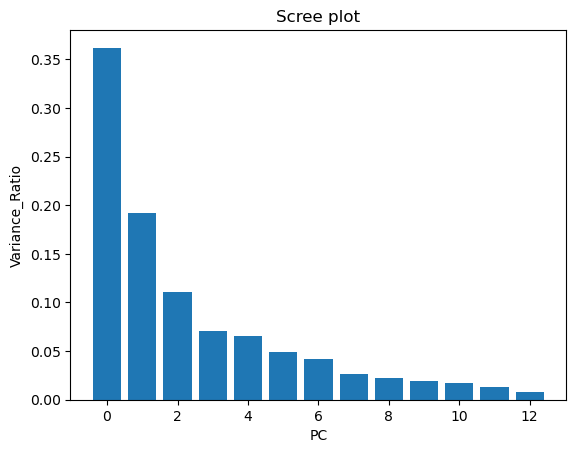

In [2]:
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 스케일링
df_mean = df.mean()  # 각 컬럼의 평균값
df_std = df.std()  # 각 컬럼의 표준편차
scaled_df = (df - df_mean)/df_std  # 컬럼별 표준화 진행

# PCA 학습
pca = PCA(n_components = 13)
pca.fit(scaled_df)    

# PC로 데이터 표현하기
scaled_df_pc = pca.transform(scaled_df)   
pca_df = pd.DataFrame(scaled_df_pc)

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

# 시각화
x = np.arange(num_components)
var = pca.explained_variance_ratio_

plt.bar(x, var)  # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

In [3]:
# 적절한 주성분 수 구하기
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
0,0.361988
1,0.554063
2,0.665300
3,0.735990
4,0.801623
5,0.850981
6,0.893368
7,0.920175
8,0.942397
9,0.961697
